In [ ]:
#Step 1: I Import Necessary Libraries for this project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Setting up the visualisation style
sns.set(style="whitegrid")
plt.style.use('seaborn-whitegrid')



In [ ]:
#Step 2: I'm Load the Dataset for further analysis

In [5]:
import pandas as pd
# Load dataset
df = pd.read_csv('E:\Capstone Project\India.csv')

# Display the data with five few rows and inspect columns
print(df.head())
print(df.info())


         date  confirmed  vaccines  people_vaccinated  \
0  22-01-2020        NaN       0.0                NaN   
1  23-01-2020        NaN       0.0                NaN   
2  24-01-2020        NaN       0.0                NaN   
3  25-01-2020        NaN       0.0                NaN   
4  26-01-2020        NaN       0.0                NaN   

   people_fully_vaccinated  school_closing  workplace_closing  cancel_events  \
0                      NaN             0.0                0.0            0.0   
1                      NaN             0.0                0.0            0.0   
2                      NaN             0.0                0.0            0.0   
3                      NaN             0.0                0.0            0.0   
4                      NaN             0.0                0.0            0.0   

   gatherings_restrictions  transport_closing  stay_home_restrictions  \
0                      0.0                0.0                     0.0   
1                      0.0    

In [ ]:
#Step 3: Exploratoring Data Analysis (EDA) through graph

          confirmed  vaccines  people_vaccinated  people_fully_vaccinated  \
count  7.710000e+02     779.0       4.080000e+02             3.790000e+02   
mean   1.697753e+07       0.0       4.567081e+08             2.639955e+08   
std    1.471401e+07       0.0       3.441271e+08             2.637703e+08   
min    1.000000e+00       0.0       0.000000e+00             7.668000e+03   
25%    2.241874e+06       0.0       1.260910e+08             4.177513e+07   
50%    1.096339e+07       0.0       4.355768e+08             1.519088e+08   
75%    3.275341e+07       0.0       7.819688e+08             4.757035e+08   
max    4.298426e+07       0.0       9.679468e+08             8.058866e+08   

       school_closing  workplace_closing  cancel_events  \
count      773.000000         769.000000     769.000000   
mean        -0.869340          -1.802341      -0.479844   
std          2.427125           1.460395       1.817858   
min         -3.000000          -3.000000      -2.000000   
25%        

C:\Users\bipas\AppData\Local\Temp\ipykernel_20756\1308558947.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


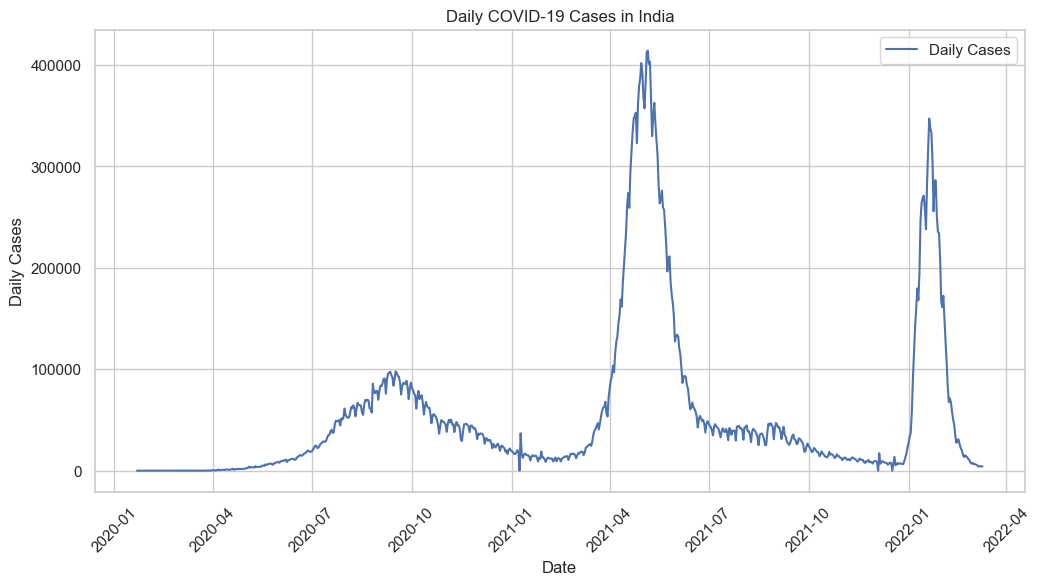

In [7]:
import pandas as pd
df = pd.read_csv('E:\Capstone Project\India.csv')
print(df.describe())
# Checking for the missing values
missing_values = df.isnull().sum()
print(missing_values)
# Forward-fill missing values
df.fillna(method='ffill', inplace=True)

# Ensure the'date' is in datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Sort by date
df = df.sort_values('date')

# Calculating the daily cases for analysis the value
df['daily_cases'] = df['confirmed'].diff().fillna(0)

# Display the first few rows to confirm the new column
print(df.head())
# Visualize daily cases over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['daily_cases'], label='Daily Cases')
plt.title('Daily COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Step 4: Using Statistical Analysis

In [8]:
# Correlation analysis between lockdown measures and daily cases
lockdown_columns = ['school_closing', 'workplace_closing', 'cancel_events', 'gatherings_restrictions', 'transport_closing']
correlation_matrix = df[lockdown_columns + ['daily_cases']].corr()

# Print correlation matrix
print(correlation_matrix)

# Statistical tests (e.g., t-tests, ANOVA) to evaluate significance
schools_open = df[df['school_closing'] == 0]['daily_cases']
schools_closed = df[df['school_closing'] == 1]['daily_cases']

t_stat, p_value = ttest_ind(schools_open, schools_closed)
print(f"T-test result for school lockdown - t-statistic: {t_stat}, p-value: {p_value}")



                         school_closing  workplace_closing  cancel_events  \
school_closing                 1.000000           0.188709       0.763850   
workplace_closing              0.188709           1.000000       0.208910   
cancel_events                  0.763850           0.208910       1.000000   
gatherings_restrictions        0.257040           0.895214       0.340358   
transport_closing             -0.118960           0.672717       0.079492   
daily_cases                   -0.173691          -0.410629      -0.237932   

                         gatherings_restrictions  transport_closing  \
school_closing                          0.257040          -0.118960   
workplace_closing                       0.895214           0.672717   
cancel_events                           0.340358           0.079492   
gatherings_restrictions                 1.000000           0.558945   
transport_closing                       0.558945           1.000000   
daily_cases                       

In [ ]:
#Step 5: For Visualization of Insights Data

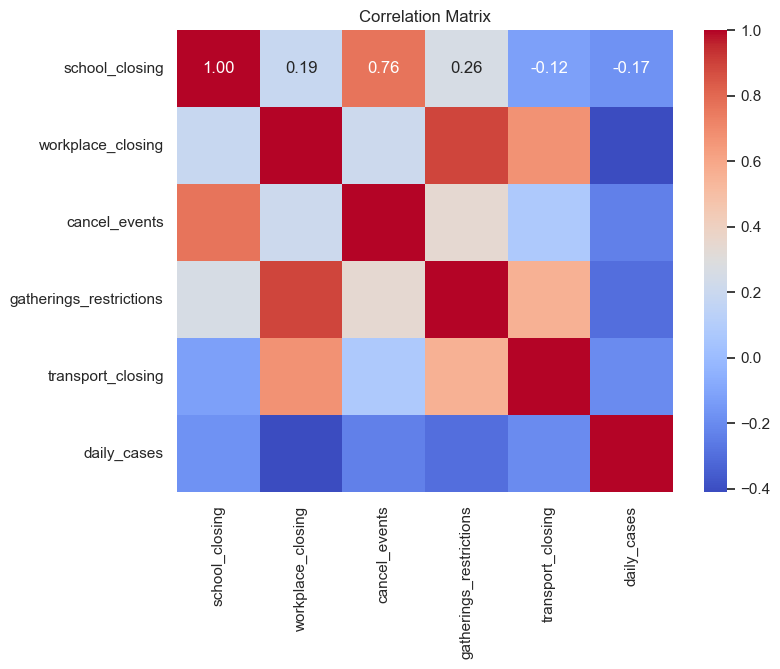

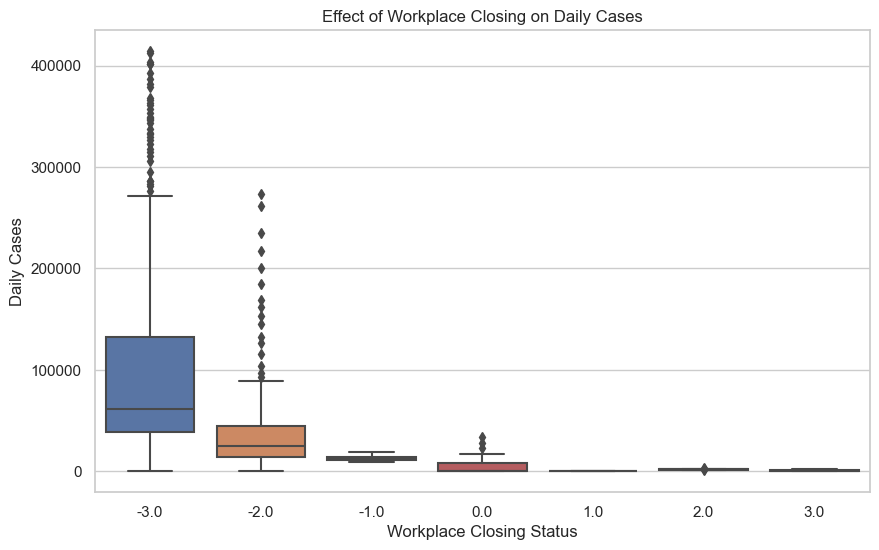

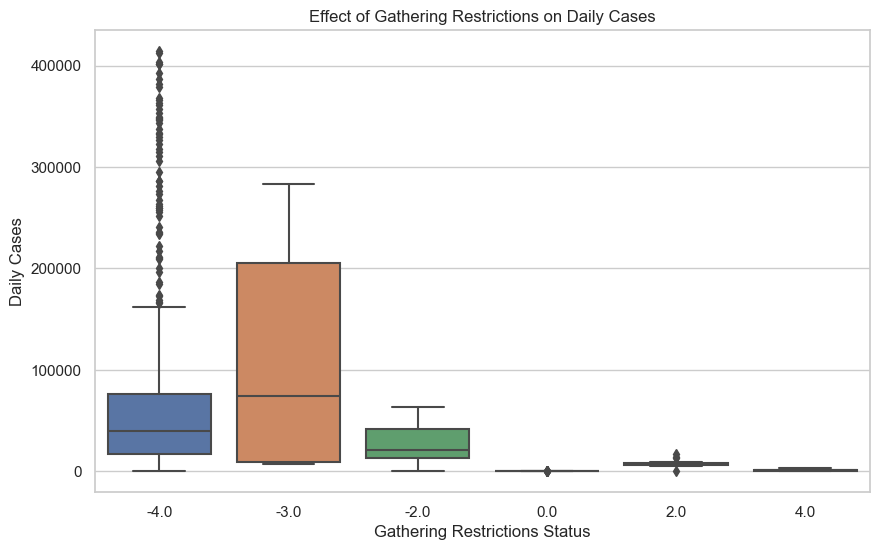

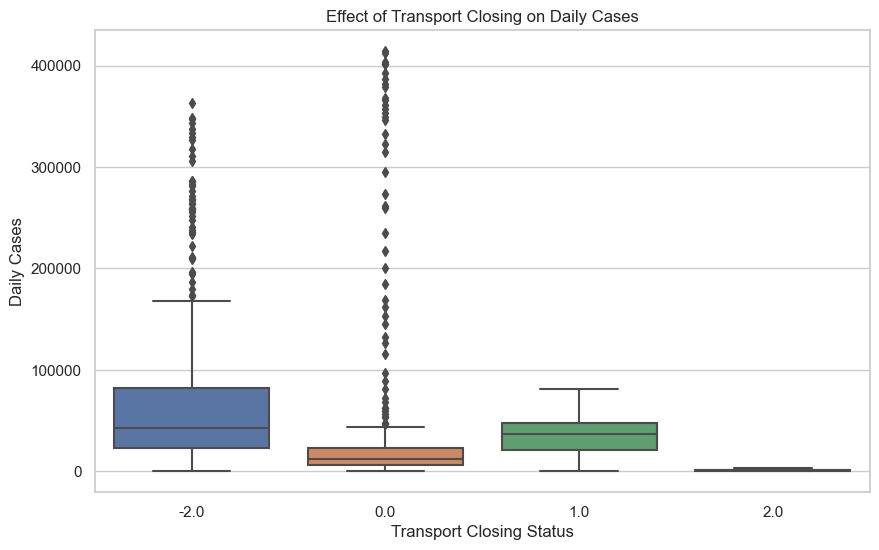

In [9]:
# Visualization of insights data through Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# And other additional visualizations for other lockdown measures
plt.figure(figsize=(10, 6))
sns.boxplot(x='workplace_closing', y='daily_cases', data=df)
plt.title('Effect of Workplace Closing on Daily Cases')
plt.xlabel('Workplace Closing Status')
plt.ylabel('Daily Cases')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='gatherings_restrictions', y='daily_cases', data=df)
plt.title('Effect of Gathering Restrictions on Daily Cases')
plt.xlabel('Gathering Restrictions Status')
plt.ylabel('Daily Cases')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='transport_closing', y='daily_cases', data=df)
plt.title('Effect of Transport Closing on Daily Cases')
plt.xlabel('Transport Closing Status')
plt.ylabel('Daily Cases')
plt.show()



In [ ]:
#Step 6: Conclusion of this project

In [11]:
conclusions = """
Based on the statistical analysis and visualizations:
1. The correlation analysis shows varying degrees of relationships between different lockdown measures and daily COVID-19 cases.
2. T-tests indicate the significance of school lockdown measures on daily cases, as evidenced by the p-value.
3. Similarly the analyses for other lockdown measures, such as workplace lockdowns, gathering restrictions, and transport lockdowns, provide insights into their impacts.
4. Visualizations highlight the differences in daily cases under different lockdown statuses.
"""

print(conclusions)



Based on the statistical analysis and visualizations:
1. The correlation analysis shows varying degrees of relationships between different lockdown measures and daily COVID-19 cases.
2. T-tests indicate the significance of school lockdown measures on daily cases, as evidenced by the p-value.
3. Similar analyses for other lockdown measures, such as workplace lockdowns, gathering restrictions, and transport lockdowns, provide insights into their impacts.
4. Visualizations highlight the differences in daily cases under different lockdown statuses.

